<be>Qs
<br>用f表达式(print(f'结果:{a}')似乎不能设定输出格式
<br>import Pi_Func:"Import "Pi_Func" could not be resolved"?sys.path.append
<br>PRO
<br>提高计算精度
<br>以精度作为循环停止的标准

莱布尼茨公式计算结果:3.121595,精确度为4e-02
欧拉公式计算结果:3.122627,精确度为4e-04
拉马努金公式计算结果:3.141593,精确度为0.0e+00


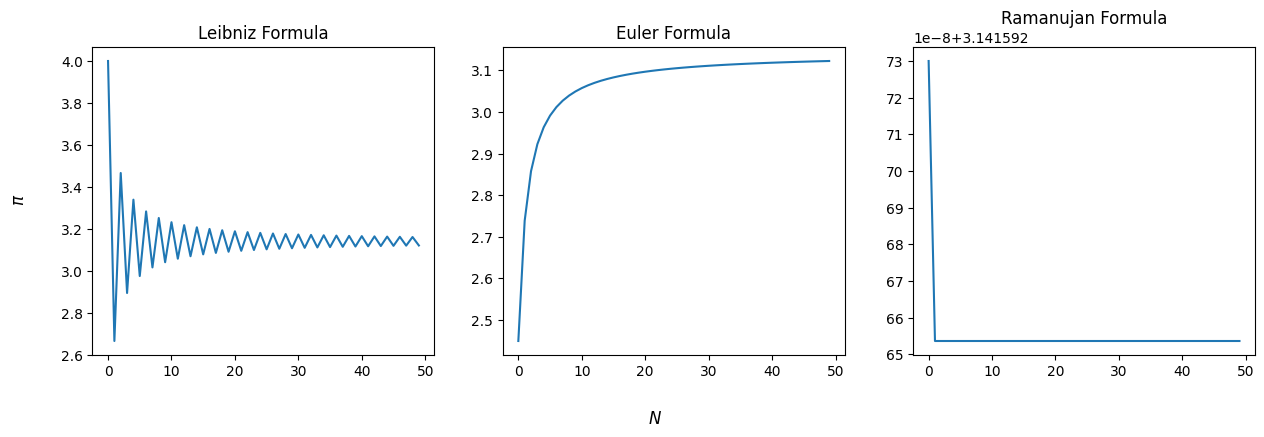

In [21]:
import Pi_Func
l=50
Leibniz_list=Pi_Func.Leibniz(l)
Euler_list=Pi_Func.Euler(l)
Ramanujan_list=Pi_Func.ramanujan_by_igfasouza(l)
#输出结果
print(
    '莱布尼茨公式计算结果:%f,精确度为%.0e'
    %(Leibniz_list[l-1],abs(Leibniz_list[l-1]-Leibniz_list[l-2]))
    )
print(
        '欧拉公式计算结果:%f,精确度为%.0e'
        %(Euler_list[l-1],abs(Euler_list[l-1]-Euler_list[l-2]))
    )
print(
        '拉马努金公式计算结果:%f,精确度为%.1e'
        %(Ramanujan_list[l-1],abs(Ramanujan_list[l-1]-Ramanujan_list[l-2]))
    )
#作图
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,3,figsize=(15,4))
fig.supylabel('$\pi$',x=0.07)
fig.supxlabel('$N$',y=-0.07)

axes[0].plot(Leibniz_list)
axes[0].set_title('Leibniz Formula')

axes[1].plot(Euler_list)
axes[1].set_title('Euler Formula')

axes[2].plot(Ramanujan_list)
axes[2].set_title('Ramanujan Formula')
plt.show()

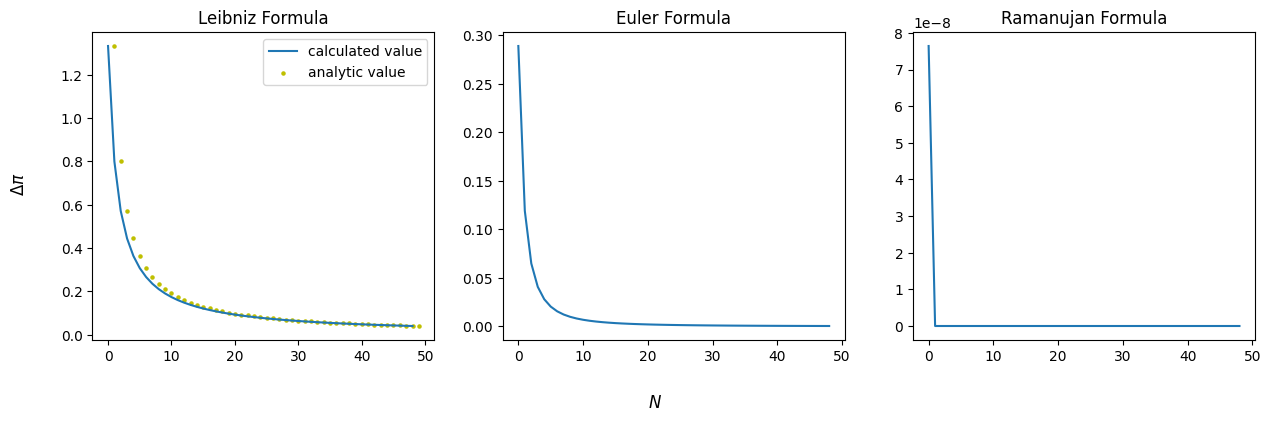

In [22]:
#delta_pi随迭代次数N的变化图像
import numpy as np
Nlist=np.arange(l)
Delta_Leibniz_analy=np.divide(4,2*Nlist+1)
Delta_Leibniz=abs(Leibniz_list[1:]-Leibniz_list[:-1])
Delta_Euler=abs(Euler_list[1:]-Euler_list[:-1])
Delta_Ramanujan=np.zeros(l-1)
for i in range(l-1):
    Delta_Ramanujan[i]=format(abs(Ramanujan_list[i+1]-Ramanujan_list[i]))

fig,axes=plt.subplots(1,3,figsize=(15,4))
fig.supylabel('$\Delta\pi$',x=0.07)
fig.supxlabel('$N$',y=-0.07)

axes[0].plot(Delta_Leibniz,label='calculated value')
axes[0].scatter(Nlist[1:],Delta_Leibniz_analy[1:],s=5,label='analytic value',c='y')
axes[0].set_title('Leibniz Formula')
axes[0].legend()

axes[1].plot(Delta_Euler)
axes[1].set_title('Euler Formula')

axes[2].plot(Delta_Ramanujan)
axes[2].set_title('Ramanujan Formula')
plt.show()

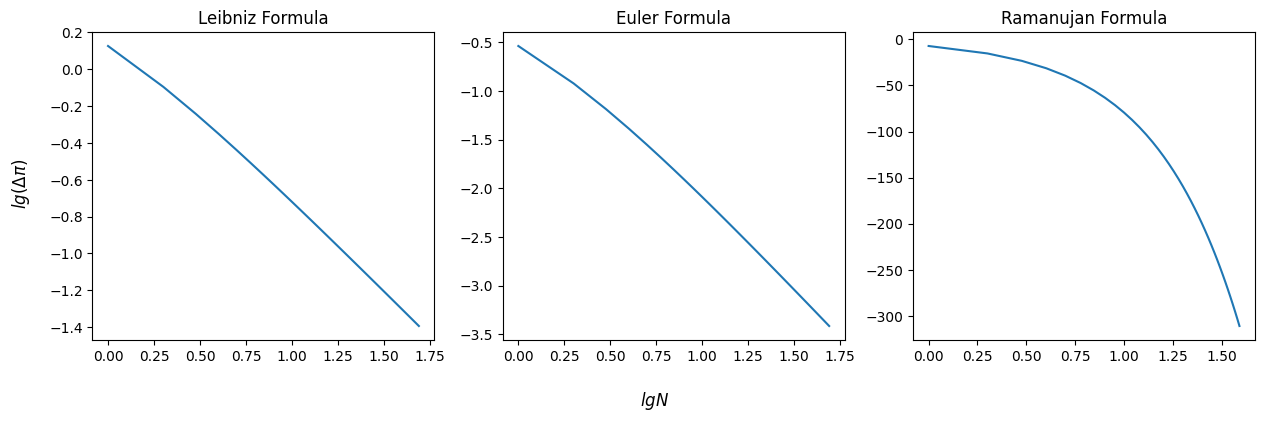

In [23]:
#lg_delta_pi的对数随迭代次数的对数变化的图像
start=0
list=np.arange(1,l)#从1开始迭代
lgn=np.log10(list[start:])
lgn_Ramanujan=np.log10(list[start:39])
lg_Delta_Leibniz=np.log10(Delta_Leibniz[start:])
lg_Delta_Euler=np.log10(Delta_Euler[start:])
lg_Delta_Ramanujan=np.log10(Delta_Ramanujan[start:39])

fig,axes=plt.subplots(1,3,figsize=(15,4))
fig.supylabel('$lg(\Delta\pi)$',x=0.07)
fig.supxlabel('$lgN$',y=-0.07)

axes[0].plot(lgn,lg_Delta_Leibniz)
axes[0].set_title('Leibniz Formula')

axes[1].plot(lgn,lg_Delta_Euler)
axes[1].set_title('Euler Formula')

axes[2].plot(lgn_Ramanujan,lg_Delta_Ramanujan)
axes[2].set_title('Ramanujan Formula')
plt.show()

In [24]:
#计算收敛精度中的β,也就是计算效率
from numpy import polyfit
coeff=polyfit(lgn,lg_Delta_Leibniz,1)
beta_Leibniz=-coeff[0]
print('莱布尼茨公式:beta=%f'%beta_Leibniz)

coeff=polyfit(lgn,lg_Delta_Euler,1)
beta_Euler=0-coeff[0]
print('欧拉公式:beta=%f'%beta_Euler)

coeff=polyfit(lgn_Ramanujan,lg_Delta_Ramanujan,1)
beta_Ramanujan=-coeff[0]
print('拉马努金公式:beta=%f'%beta_Ramanujan)

莱布尼茨公式:beta=0.935311
欧拉公式:beta=1.801761
拉马努金公式:beta=220.329023
